# IDAF 📊


# Data Preparation

The initial data included the mean value for different european countries. This dataset can have a huge impact on overall visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Import data
df2008to2010 = pd.read_csv('./data/data_2008-2010.csv',
                           sep=';').assign(timespan='2008-2010')

df2018to2020 = pd.read_csv('./data/data_2018-2020.csv',
                           sep=';').assign(timespan='2018-2020')

# Combine
df = pd.concat([df2008to2010, df2018to2020])

In [3]:
# Helpers
def format_hist(hist):
    for ax in hist.flatten():
        ax.set_xlabel("in %")
        ax.set_ylabel("Häufigkeit")

In [4]:
# Describe
df2008to2010['Frauenanteil bei den Studierenden im Tertiärbereich 1'].describe(
)


count    28.000000
mean     55.550000
std       4.056134
min      48.300000
25%      53.450000
50%      55.400000
75%      58.000000
max      64.400000
Name: Frauenanteil bei den Studierenden im Tertiärbereich 1, dtype: float64

In [5]:
# Describe
df2018to2020['Frauenanteil bei den Studierenden im Tertiärbereich 1'].describe(
)


count    32.000000
mean     54.587500
std       4.771944
min      35.800000
25%      53.050000
50%      55.000000
75%      57.200000
max      63.600000
Name: Frauenanteil bei den Studierenden im Tertiärbereich 1, dtype: float64

In [6]:
# Describe
df2008to2010['Frauenanteil in nationalen Parlamenten'].describe(
)

count    28.000000
mean     23.757143
std      10.342556
min       8.700000
25%      16.800000
50%      21.050000
75%      29.950000
max      45.000000
Name: Frauenanteil in nationalen Parlamenten, dtype: float64

In [7]:
# Describe
df2018to2020['Frauenanteil in nationalen Parlamenten'].describe(
)

count    32.000000
mean     30.744375
std       9.917911
min      12.000000
25%      22.500000
50%      30.565000
75%      39.547500
max      46.990000
Name: Frauenanteil in nationalen Parlamenten, dtype: float64

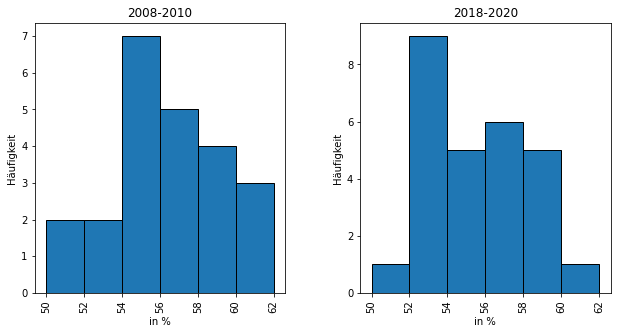

In [8]:
# Print hist for Frauenanteil bei den Studierenden im Tertiärbereich 1 2008-2010, 2018-2020
bins = np.arange(start=50, stop=64, step=2)
hist = df.hist(column='Frauenanteil bei den Studierenden im Tertiärbereich 1',
               figsize=[10, 5],
               by='timespan',
               bins=bins,
               edgecolor='black')

format_hist(hist)

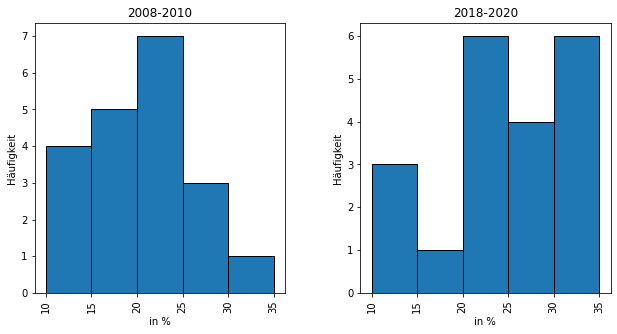

In [9]:
# Print hist for Frauenanteil in nationalen Parlamenten 2008-2010, 2018-2020
bins = np.arange(start=10, stop=40, step=5)
hist = df.hist(column='Frauenanteil in nationalen Parlamenten',
               figsize=[10, 5],
               by='timespan',
               bins=bins,
               edgecolor='black')

format_hist(hist)

<AxesSubplot:title={'center':'Frauenanteil bei den Studierenden im Tertiärbereich 1'}, xlabel='timespan'>

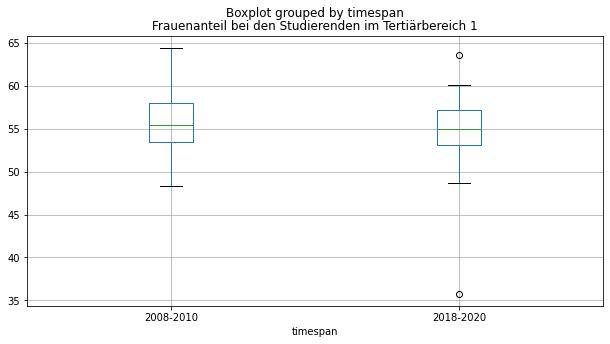

In [10]:
# Print boxplot
df.boxplot(by='timespan',
           column='Frauenanteil bei den Studierenden im Tertiärbereich 1',
           figsize=(10, 5))

<AxesSubplot:title={'center':'Frauenanteil in nationalen Parlamenten'}, xlabel='timespan'>

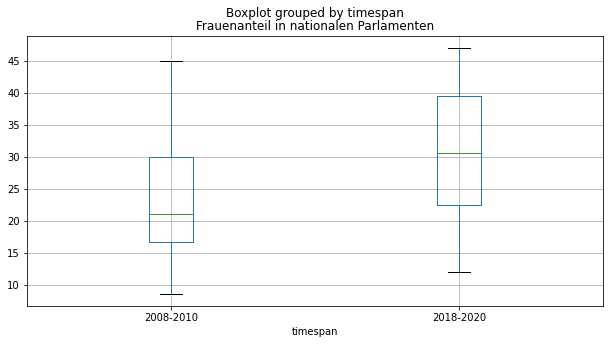

In [11]:
# Print boxplot
df.boxplot(by='timespan',
           column='Frauenanteil in nationalen Parlamenten',
           figsize=(10, 5))
